# Importação das bibliotecas

In [64]:
!pip -q install plotly

In [65]:
!pip -q install yellowbrick

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

### Exploração dos dados

In [72]:
base_credit = pd.read_csv('/content/credit_risk_dataset.csv')

In [73]:
base_credit

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [74]:
base_credit.head(10)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   
6          26          77100                  RENT                8.0   
7          24          78956                  RENT                5.0   
8          24          83000                  RENT                8.0   
9          21          10000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   
6   EDUCATION          B      35000          12.42            1   
7     MEDICAL          B      35000          11.11            1   
8    PERSONAL          A      35000           8.90            1   
9     VENTURE          D       1600          14.74            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2  
6                 0.45                         N                           3  
7                 0.44                         N                           4  
8                 0.42                         N                           2  
9                 0.16                         N                           3

In [75]:
base_credit.tail(8)

person_age  person_income person_home_ownership  person_emp_length  \
32573          56          90000              MORTGAGE                0.0   
32574          52          65004                  RENT                4.0   
32575          52          64500                  RENT                0.0   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32573         PERSONAL          A       7200           6.17            0   
32574         PERSONAL          D      20000          15.58            1   
32575        EDUCATION          B       5000          11.26            0   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32573                 0.08                         N   
32574                 0.31                         Y   
32575                 0.08                         N   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32573                          19  
32574                          19  
32575                          20  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

In [76]:
base_credit.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Visualização dos dados


In [77]:
np.unique(base_credit['cb_person_default_on_file'], return_counts=True)

(array(['N', 'Y'], dtype=object), array([26836,  5745]))

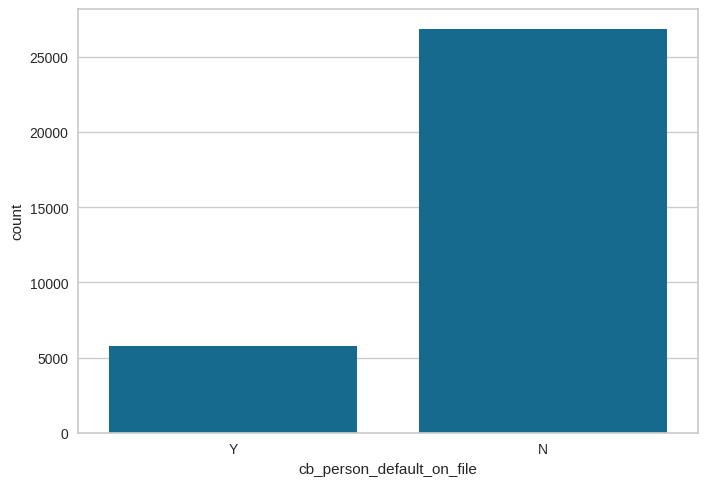

In [78]:
sns.countplot(x = base_credit['cb_person_default_on_file']);

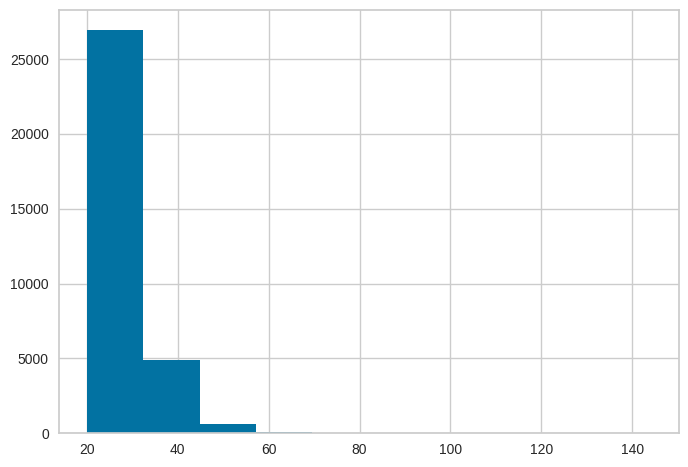

In [79]:
plt.hist(x = base_credit['person_age']);

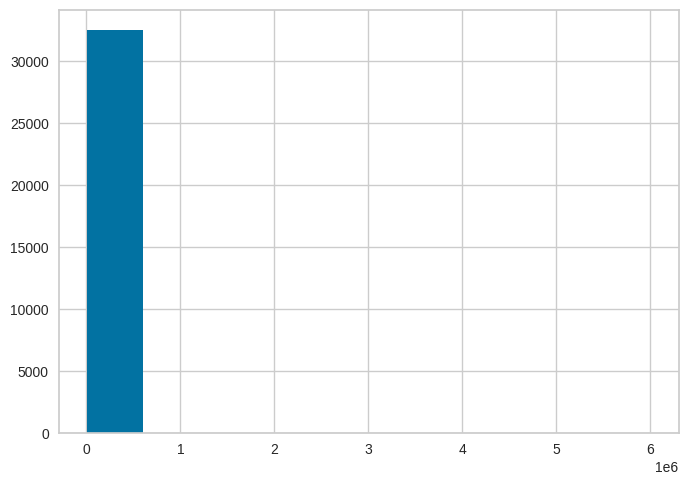

In [80]:
plt.hist(x = base_credit['person_income']);

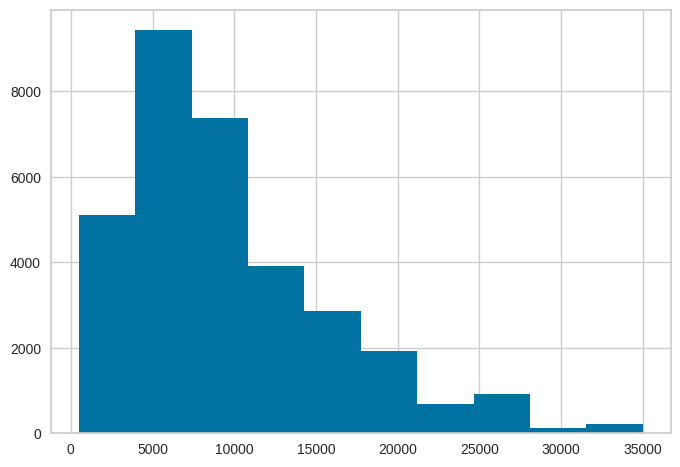

In [81]:
plt.hist(x = base_credit['loan_amnt']);

In [82]:
grafico = px.scatter_matrix(base_credit, dimensions=['person_age', 'person_income', 'loan_amnt'], color = 'cb_person_default_on_file')
grafico.show()

### Tratamento de valores inconsistentes e faltantes


> Limpeza de dados

> Remoção de inconsistências

> Organização dos tipos








In [83]:
base_credit.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [84]:
base_credit.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [85]:
missing_values = base_credit.isna().sum()
missing_values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [86]:
duplicates = base_credit.duplicated().sum()
duplicates


np.int64(165)

In [87]:

df = base_credit.copy()

# Apenas colunas numéricas
df_num = df.select_dtypes(include="number")

# Calcular Q1, Q3 e IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Mascara booleana de outliers
outlier_mask = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# Quantos outliers por coluna numerica
outliers_por_coluna = outlier_mask.sum().sort_values(ascending=False)

# Linhas do dataset original que têm pelo menos 1 outlier em alguma coluna numerica
linhas_com_outlier = df[outlier_mask.any(axis=1)]

outliers_por_coluna, linhas_com_outlier

(loan_status                   7108
 loan_amnt                     1689
 person_age                    1494
 person_income                 1484
 cb_person_cred_hist_length    1142
 person_emp_length              853
 loan_percent_income            651
 loan_int_rate                    6
 dtype: int64,
        person_age  person_income person_home_ownership  person_emp_length  \
 0              22          59000                  RENT              123.0   
 2              25           9600              MORTGAGE                1.0   
 3              23          65500                  RENT                4.0   
 4              24          54400                  RENT                8.0   
 5              21           9900                   OWN                2.0   
 ...           ...            ...                   ...                ...   
 32576          57          53000              MORTGAGE                1.0   
 32577          54         120000              MORTGAGE                4.

In [88]:
# Apagar somente os registros com valores inconsistentes
base_credit_clean = base_credit.dropna()
base_credit_clean.describe()


person_age  person_income  person_emp_length     loan_amnt  \
count  28638.000000   2.863800e+04       28638.000000  28638.000000   
mean      27.727216   6.664937e+04           4.788672   9656.493121   
std        6.310441   6.235645e+04           4.154627   6329.683361   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.595600e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28638.000000  28638.000000         28638.000000   
mean       11.039867      0.216600             0.169488   
std         3.229372      0.411935             0.106393   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                28638.000000  
mean                     5.793736  
std                      4.038483  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [89]:
# Converter colunas para numerico
base_credit['person_age'] = pd.to_numeric(base_credit['person_age'], errors='coerce')
base_credit['person_income'] = pd.to_numeric(base_credit['person_income'], errors='coerce')
base_credit['loan_amnt'] = pd.to_numeric(base_credit['loan_amnt'], errors='coerce')
base_credit['loan_int_rate'] = pd.to_numeric(base_credit['loan_int_rate'], errors='coerce')


In [90]:
df_num = base_credit.select_dtypes(include='number')
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [91]:
# Identificar outliers
outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# Remover as linhas com outliers
base_credit_clean = base_credit[~outliers.any(axis=1)]


In [92]:
base_credit_clean.describe()
base_credit_clean.isna().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              554
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2061
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [93]:
base_credit_clean2 = base_credit_clean.dropna(subset=['person_emp_length', 'loan_int_rate'])
base_credit_clean2


person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
23             24          10980                   OWN                0.0   
27             23          11000                   OWN                0.0   
65             22          12000              MORTGAGE                7.0   
96             24          12360                   OWN                2.0   
...           ...            ...                   ...                ...   
32251          36          61000              MORTGAGE                2.0   
32257          37          21600                  RENT                7.0   
32261          37          46680              MORTGAGE                6.0   
32290          37          90000              MORTGAGE               11.0   
32293          38         110000              MORTGAGE                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1              EDUCATION          B       1000          11.14            0   
23              PERSONAL          A       1500           7.29            0   
27              PERSONAL          A       1400           9.32            0   
65             EDUCATION          D       1500          14.84            0   
96               MEDICAL          C       1600          13.57            0   
...                  ...        ...        ...            ...          ...   
32251            VENTURE          B      10000          10.25            0   
32257            MEDICAL          B       3000          12.18            0   
32261            VENTURE          D       8000          15.21            0   
32290  DEBTCONSOLIDATION          A       4000           6.62            0   
32293            MEDICAL          B      16000          11.99            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
23                    0.14                         N   
27                    0.13                         N   
65                    0.13                         Y   
96                    0.13                         N   
...                    ...                       ...   
32251                 0.16                         N   
32257                 0.14                         N   
32261                 0.17                         N   
32290                 0.04                         N   
32293                 0.15                         N   

       cb_person_cred_hist_length  
1                               2  
23                              3  
27                              3  
65                              3  
96                              3  
...                           ...  
32251                          14  
32257                          14  
32261                          15  
32290                          15  
32293                          13  

[18839 rows x 12 columns]

In [94]:
base_credit_clean2.isna().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [95]:
base_credit = base_credit.drop_duplicates().copy()
base_credit.duplicated().sum()

base_credit.shape
base_credit.isna().sum()
base_credit.duplicated().sum()
base_credit.dtypes



person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [96]:
missing_values2 = base_credit.isnull().sum().sort_values(ascending=False)
missing_values2

loan_int_rate                 3095
person_emp_length              887
person_income                    0
person_age                       0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [97]:
base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean(), inplace=True)
base_credit['person_emp_length'].fillna(base_credit['person_emp_length'].mean(), inplace=True)
base_credit[['loan_int_rate', 'person_emp_length']].isna().sum()



/tmp/ipython-input-2929/898000553.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2929/898000553.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

loan_int_rate        0
person_emp_length    0
dtype: int64

### Divisão entre previsores e classe

In [98]:
base_credit.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [99]:
X_credit = base_credit.drop(columns=['loan_status'])
y_credit = base_credit['loan_status']


### Escalonamento dos valores

In [100]:
X_credit.select_dtypes(include='number').agg(['min', 'max'])


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
min          20           4000                0.0        500           5.42   
max         144        6000000              123.0      35000          23.22   

     loan_percent_income  cb_person_cred_hist_length  
min                 0.00                           2  
max                 0.83                          30

In [101]:
X_num = X_credit.select_dtypes(include='number')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

In [102]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled_df.agg(['min', 'max'])

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
min   -1.219233      -1.001242          -1.171757  -1.438300      -1.815530   
max   18.296027      95.685630          28.913989   4.018287       3.958081   

     loan_percent_income  cb_person_cred_hist_length  
min            -1.593946                   -0.938982  
max             6.176838                    5.959324

# Base de dados do censo

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult

## Exploração dos dados

In [103]:
data_path  = "/content/adult.data"
test_path  = "/content/adult.test"

# Adicionando colunas - No df não tinha
cols = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]

# Treino (adult.data)
train = pd.read_csv(
    data_path,
    header=None,
    names=cols,
    sep=",",
    skipinitialspace=True,
    na_values="?"
)

# Teste (adult.test): pular linhas que começam com "|"
test = pd.read_csv(
    test_path,
    header=None,
    names=cols,
    sep=",",
    skipinitialspace=True,
    na_values="?",
    comment="|"
)

# No arquivo de teste, a classe vem com "." no final: "<=50K." e ">50K."
test["income"] = test["income"].str.replace(".", "", regex=False)

train, test


(       age         workclass  fnlwgt   education  education-num  \
 0       39         State-gov   77516   Bachelors             13   
 1       50  Self-emp-not-inc   83311   Bachelors             13   
 2       38           Private  215646     HS-grad              9   
 3       53           Private  234721        11th              7   
 4       28           Private  338409   Bachelors             13   
 ...    ...               ...     ...         ...            ...   
 32556   27           Private  257302  Assoc-acdm             12   
 32557   40           Private  154374     HS-grad              9   
 32558   58           Private  151910     HS-grad              9   
 32559   22           Private  201490     HS-grad              9   
 32560   52      Self-emp-inc  287927     HS-grad              9   
 
            marital-status         occupation   relationship   race     sex  \
 0           Never-married       Adm-clerical  Not-in-family  White    Male   
 1      Married-civ-spou

In [104]:
base_census = pd.concat([train, test], axis=0, ignore_index=True)
base_census.shape

(48842, 15)

In [105]:
base_census

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country income  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States  <=50K  
3      United-States  <=50K  
4               Cuba  <=50K  
...              ...    ...  
48837  United-States  <=50K  
48838  United-States  <=50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K  

[48842 rows x 15 columns]

In [106]:
base_census.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [107]:
base_census.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

## Visualização dos dados

In [108]:
np.unique(base_census['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([37155, 11687]))

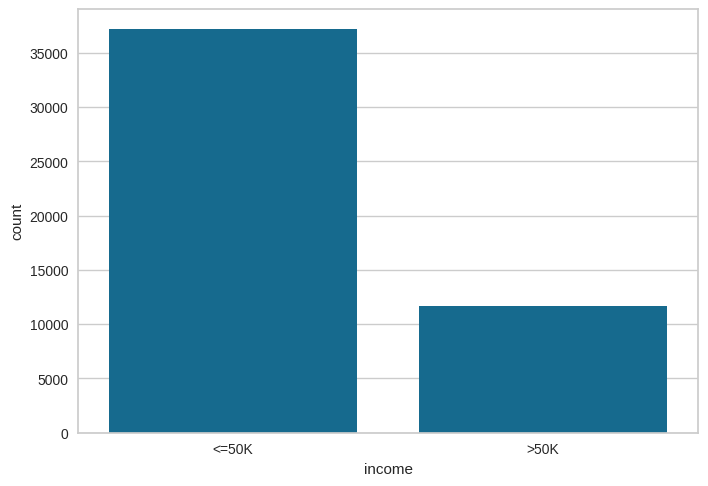

In [109]:
sns.countplot(x = base_census['income']);

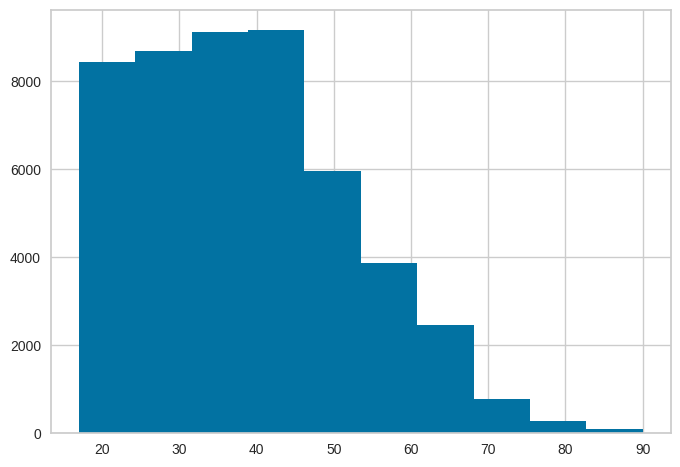

In [110]:
plt.hist(x = base_census['age']);

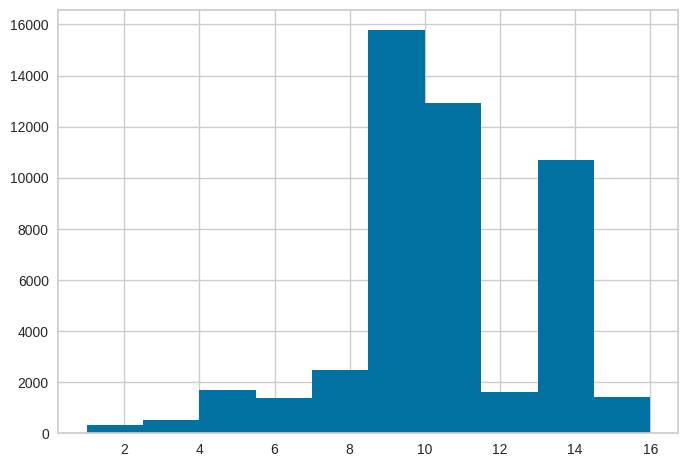

In [111]:
plt.hist(x = base_census['education-num']);

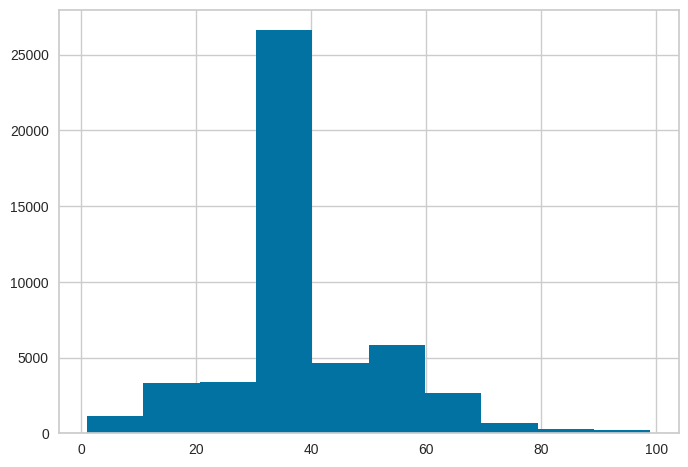

In [112]:
plt.hist(x = base_census['hours-per-week']);

In [113]:
df_plot = base_census.dropna(subset=['workclass', 'age'])

grafico = px.treemap(
    df_plot,
    path=['workclass'],
    values='age'
)
grafico.show()

In [114]:
df_plot = base_census.dropna(subset=['occupation', 'relationship'])

grafico = px.treemap(
    df_plot,
    path=['occupation', 'relationship']
)
grafico.show()


In [115]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [116]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [117]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe

In [118]:
base_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [119]:
X_census = base_census.drop(columns=['income'])
y_census = base_census['income']


In [120]:
y_census

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

## Tratamento de atributos categóricos

### LabelEncoder

In [121]:
from sklearn.preprocessing import LabelEncoder

#Fazendo LabelEncoder para coluna workclass
le_workclass = LabelEncoder()
base_census['workclass'] = le_workclass.fit_transform(base_census['workclass'])


In [122]:
base_census['workclass']
#le_workclass.classes_

0        6
1        5
2        3
3        3
4        3
        ..
48837    3
48838    8
48839    3
48840    3
48841    4
Name: workclass, Length: 48842, dtype: int64

In [123]:
#Fazendo LabelEncoder para as outras colunas

categoricas = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country'
]

encoders = {}

for col in categoricas:
    le = LabelEncoder()
    base_census[col] = le.fit_transform(base_census[col].fillna('Unknown'))
    encoders[col] = le

In [124]:
base_census[categoricas].head()

workclass  education  marital-status  occupation  relationship  race  sex  \
0          6          9               4           0             1     4    1   
1          5          9               2           3             0     4    1   
2          3         11               0           5             1     4    1   
3          3          1               2           5             0     2    1   
4          3          9               2           9             5     2    0   

   native-country  
0              38  
1              38  
2              38  
3              38  
4               4

### OneHotEncoder

In [125]:
len(np.unique(base_census['workclass']))

9

In [126]:
len(np.unique(base_census['occupation']))

15

In [127]:
base_census.dtypes


age                int64
workclass          int64
fnlwgt             int64
education          int64
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income            object
dtype: object

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [129]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [130]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [131]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [132]:
X_census.shape

(48842, 108)

## Escalonamento dos valores

In [133]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [134]:
X_census[0]

array([-1.73794701e-01, -2.61939756e-01, -1.43102672e-02, -1.50668036e+00,
       -1.89608507e-01, -2.93019423e-01,  4.86366370e+00, -2.07398835e-02,
       -2.46558309e-01, -1.71087896e-01, -1.96287032e-01, -1.16768783e-01,
       -7.12939510e-02, -1.02621183e-01, -1.41218915e-01, -1.25386729e-01,
       -1.84092512e-01, -2.09896040e-01,  2.25526729e+00, -1.10956708e-01,
       -6.90987591e-01, -2.39853082e-01, -4.12583306e-02, -1.31803280e-01,
       -5.35289279e-01, -3.96417179e-01, -2.75339617e-02, -9.19603890e-01,
       -1.14128272e-01,  1.42494376e+00, -1.79829138e-01, -1.79099826e-01,
        2.77573184e+00, -1.75273238e-02, -3.78203224e-01, -3.77283176e-01,
       -1.77387891e-01, -2.10480172e-01, -2.56814587e-01, -3.34802503e-01,
       -7.05650329e-02, -3.80322166e-01, -1.43316089e-01, -3.56372989e-01,
       -1.74667981e-01, -2.25076263e-01, -2.47025183e-01, -8.22752067e-01,
        1.69752357e+00, -1.78367904e-01, -4.28640669e-01, -3.42390542e-01,
       -2.23868659e-01, -

# Divisão das bases em treinamento e teste

In [135]:
from sklearn.model_selection import train_test_split

## Credit data

In [136]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [137]:
X_credit_treinamento.shape

(24312, 11)

In [138]:
y_credit_treinamento.shape

(24312,)

In [139]:
X_credit_teste.shape, y_credit_teste.shape

((8104, 11), (8104,))

## Census

In [140]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0)

In [141]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [142]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

## Salvar as variáveis

In [143]:
import pickle

In [144]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [145]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

# Naïve Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB

## Base risco de crédito

In [147]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [148]:
base_risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [149]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [150]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [151]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [152]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [153]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [154]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [155]:





















naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [156]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [157]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [158]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [159]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [160]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base credit data - 93.80%

In [161]:
import pickle
with open('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [162]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((24312, 11), (24312,))

In [163]:
X_credit_teste.shape, y_credit_teste.shape

((8104, 11), (8104,))

In [164]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

ValueError: could not convert string to float: 'OWN'

In [165]:
previsoes = naive_credit_data.predict(X_credit_teste)

ValueError: could not convert string to float: 'MORTGAGE'

In [166]:
y_credit_teste

21641    0
74       1
416      1
9369     0
6814     0
        ..
15824    0
15407    0
16106    0
3691     1
10390    1
Name: loan_status, Length: 8104, dtype: int64

In [167]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [168]:
accuracy_score(y_credit_teste, previsoes)

ValueError: Found input variables with inconsistent numbers of samples: [8104, 7327]

In [169]:
confusion_matrix(y_credit_teste, previsoes)

ValueError: Found input variables with inconsistent numbers of samples: [8104, 7327]

In [170]:
from yellowbrick.classifier import ConfusionMatrix

In [171]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



ValueError: could not convert string to float: 'OWN'

In [172]:
print(classification_report(y_credit_teste, previsoes))

ValueError: Found input variables with inconsistent numbers of samples: [8104, 7327]

## Base census - 47.67%

In [173]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [174]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [175]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [176]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array(['>50K', '>50K', '>50K', ..., '>50K', '<=50K', '>50K'], dtype='<U5')

In [177]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [178]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

0.5911014057595196

0.5911014057595196

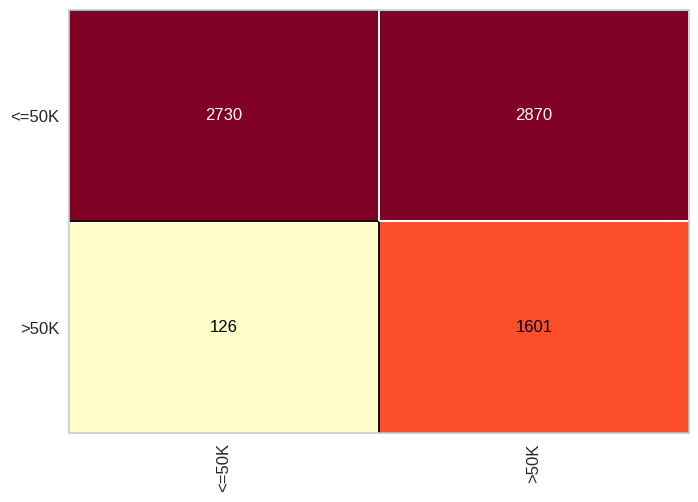

In [179]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [180]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.96      0.49      0.65      5600
        >50K       0.36      0.93      0.52      1727

    accuracy                           0.59      7327
   macro avg       0.66      0.71      0.58      7327
weighted avg       0.81      0.59      0.62      7327



# Árvores de decisão

In [181]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito

In [182]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [183]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [184]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [185]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [186]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

In [187]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

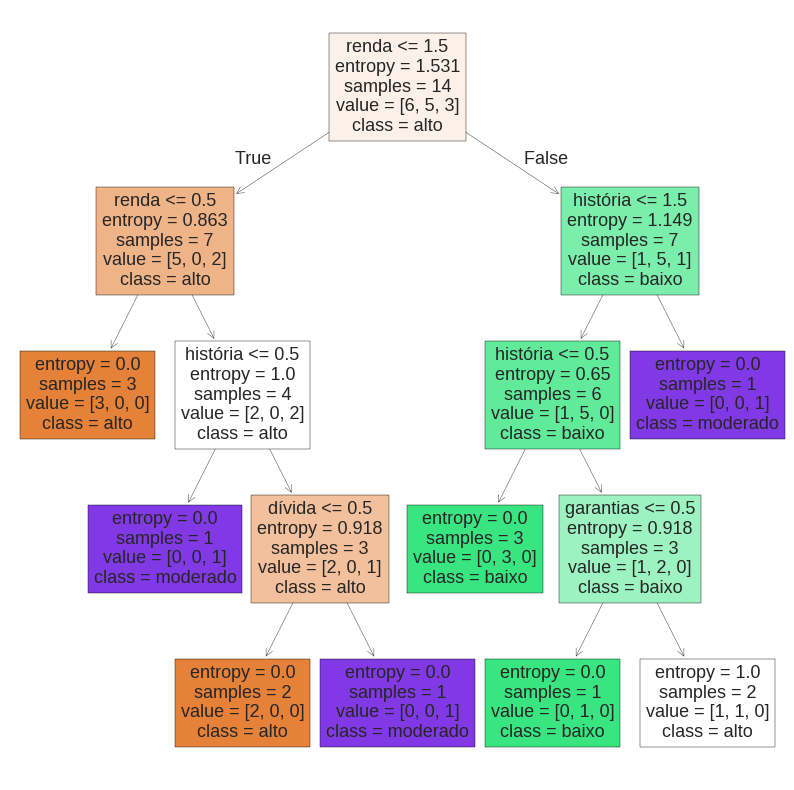

In [188]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [189]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base credit data - 98.20%

In [190]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [191]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [192]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [193]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [194]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [195]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [196]:
accuracy_score(y_census_teste, previsoes)

0.8251671898457759

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    naive_credit_data, X_credit_teste, y_credit_teste
)

ValueError: could not convert string to float: 'OWN'

In [198]:
from yellowbrick.classifier import ConfusionMatrix

0.8251671898457759

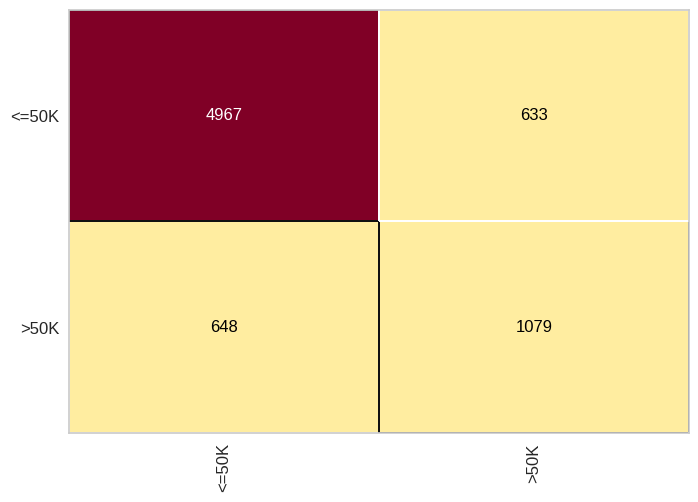

In [199]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [200]:
print(X_census_teste.shape)
print(y_census_teste.shape)
print(previsoes.shape)


(7327, 108)
(7327,)
(7327,)


# Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier

## Base credit data - 98.40%

In [217]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [218]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [219]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [220]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [222]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [223]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [224]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

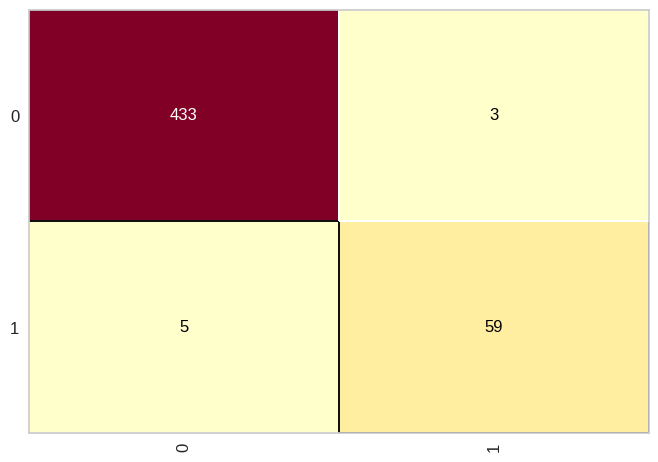

In [225]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [226]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



## Base census - 85.07%

In [227]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [228]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [229]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [230]:
y_census_treinamento

44253    <=50K
20615    <=50K
43609     >50K
46477    <=50K
15869     >50K
         ...  
21243    <=50K
45891     >50K
42613     >50K
43567     >50K
2732     <=50K
Name: income, Length: 41515, dtype: object

In [231]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [232]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [233]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [234]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.854783676811792

0.854783676811792

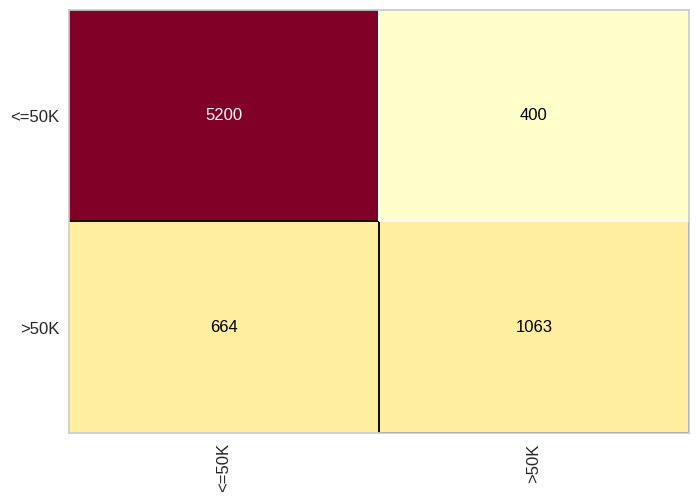

In [235]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [236]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      5600
        >50K       0.73      0.62      0.67      1727

    accuracy                           0.85      7327
   macro avg       0.81      0.77      0.79      7327
weighted avg       0.85      0.85      0.85      7327



# Regras

In [318]:
!pip install Orange3==3.36.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install -U pip setuptools wheel
!pip install -U Orange3==3.40.0


  Using cached setuptools-82.0.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
Using cached setuptools-82.0.0-py3-none-any.whl (1.0 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached commonmark-0.9.1-py2.py3-none-any.whl.metadata (5.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.8 MB/s  0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 20.7 MB/s  0:00:00
Using cached commonmark-0.9.1-py2.py3-none-any.whl (51 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s  0:00:00
  Created wheel for baycomp: filename=baycomp-1.0.3-py3-none-any.whl size=18113 sha256=91a52a9e0868e4e5358aa22a8f28d97d63434f7cb3bdec9025c46aab5a379026
  Stored in directory: /root/.cache/pip/wheels/ff/39/6a/f87e05ad75b9d87f4eb2

In [2]:
import Orange
print(Orange.__version__)


3.40.0


## Base risco de crédito

In [237]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv')

In [238]:
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [240]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [241]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [242]:
for regras in regras_risco_credito.rule_list:
  print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida==baixa THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda==acima_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia==ruim THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [243]:
#comparar previsão com o “y verdadeiro”
classes = base_risco_credito.domain.class_var.values

y_true_idx = [int(row.get_class()) for row in base_risco_credito]
y_true = [classes[i] for i in y_true_idx]

pred_idx = [int(regras_risco_credito(row)) for row in base_risco_credito]
pred = [classes[i] for i in pred_idx]

for i in range(10):
    print(i, "real:", y_true[i], "| previsto:", pred[i])


0 real: alto | previsto: alto
1 real: alto | previsto: alto
2 real: moderado | previsto: moderado
3 real: alto | previsto: alto
4 real: baixo | previsto: alto
5 real: baixo | previsto: baixo
6 real: alto | previsto: alto
7 real: moderado | previsto: moderado
8 real: baixo | previsto: baixo
9 real: baixo | previsto: baixo


## Base credit data - 97.40%

In [244]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [245]:
base_credit.domain

[income, age, loan | default]

In [246]:
base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)

In [247]:
base_dividida

([[52841.5, 18.446, 5957.39 | 0],
  [57296.2, 25.7085, 10601.1 | 1],
  [23763.1, 39.3931, 2950.31 | 0],
  [51935.2, 21.4955, 5649.45 | 0],
  [41255.9, 45.5833, 5296.91 | 0],
  ...
 ],
 [[40719.5, 22.9269, 6415.09 | 1],
  [55097.4, 33.9294, 9342.48 | 1],
  [22209, 22.0063, 4096.78 | 1],
  [24912.8, 49.3664, 267.696 | 0],
  [43777.5, 20.0109, 3601.3 | 0],
  ...
 ])

In [248]:
base_dividida[0]

[[52841.5, 18.446, 5957.39 | 0],
 [57296.2, 25.7085, 10601.1 | 1],
 [23763.1, 39.3931, 2950.31 | 0],
 [51935.2, 21.4955, 5649.45 | 0],
 [41255.9, 45.5833, 5296.91 | 0],
 ...
]

In [249]:
base_dividida[1]

[[40719.5, 22.9269, 6415.09 | 1],
 [55097.4, 33.9294, 9342.48 | 1],
 [22209, 22.0063, 4096.78 | 1],
 [24912.8, 49.3664, 267.696 | 0],
 [43777.5, 20.0109, 3601.3 | 0],
 ...
]

In [250]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [251]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [252]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [253]:
for regras in regras_credit.rule_list:
  print(regras)

IF age>=34.9257164876908 THEN default=0 
IF loan<=2507.64970973955 AND income>=20145.9885970689 THEN default=0 
IF age<=18.075335860718 AND income>=50501.7266888171 THEN default=0 
IF loan>=7218.9682240579195 AND loan>=7708.31562497011 THEN default=1 
IF income>=58132.4712652713 THEN default=0 
IF loan>=5836.56338145928 AND age>=26.9590053195134 THEN default=1 
IF loan>=5836.56338145928 AND loan>=6415.0862444378 THEN default=1 
IF income>=48552.843409124805 THEN default=0 
IF loan>=5416.3577980789005 AND loan>=5785.88427485782 THEN default=1 
IF age<=18.4162362311035 AND income>=32197.6207010448 THEN default=0 
IF age<=18.713332561776 AND age>=18.713332561776 THEN default=0 
IF age<=18.8531892849132 AND age>=18.8531892849132 THEN default=0 
IF age<=19.084409590344897 AND age>=19.084409590344897 THEN default=0 
IF age<=19.716176087502397 AND age>=19.716176087502397 THEN default=0 
IF age<=20.0109276962467 AND age>=20.0109276962467 THEN default=0 
IF age<=20.0963994744234 AND age>=20.096

In [254]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [255]:
previsoes

In [256]:
Orange.evaluation.CA(previsoes)

array([0.98])

## Base census - 78.90% (executado na interface gráfica do Orange)

# Classificador base - Majority learner

## Base credit data - 85.85%

In [257]:
base_credit = Orange.data.Table('credit_data_regras.csv')

In [258]:
base_credit.domain

[income, age, loan | default]

In [259]:
majority = Orange.classification.MajorityLearner()

In [260]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [261]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [262]:
for registro in base_credit:
  print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [263]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

In [264]:
1717 / 2000

0.8585

## Base census - 75.91%

In [265]:
base_census = Orange.data.Table('census_regras.csv')

In [266]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [267]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [268]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [269]:
24720 / (24720 + 7841)

0.7591904425539756

# Aprendizagem baseada em instâncias - knn

In [270]:
from sklearn.neighbors import KNeighborsClassifier

## Base credit data - 98.60%

In [271]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [272]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [273]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [274]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [275]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [276]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [277]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.986

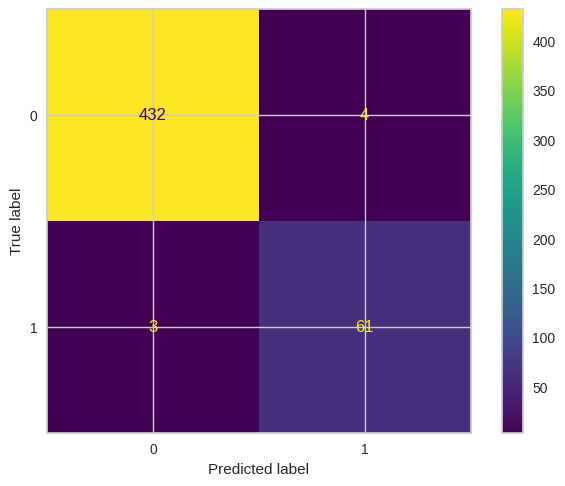

In [278]:
from sklearn.metrics import ConfusionMatrixDisplay

knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

ConfusionMatrixDisplay.from_estimator(
    knn_credit, X_credit_teste, y_credit_teste
)


0.986

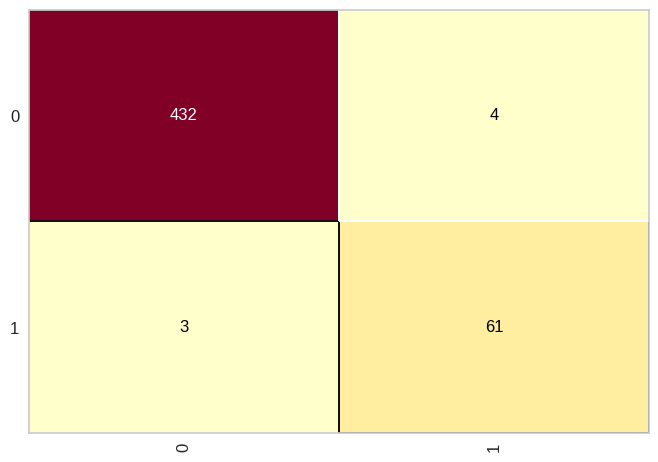

In [279]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [280]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base census - 82.90%

In [281]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [282]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [283]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [284]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [285]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [286]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [287]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8313088576497885

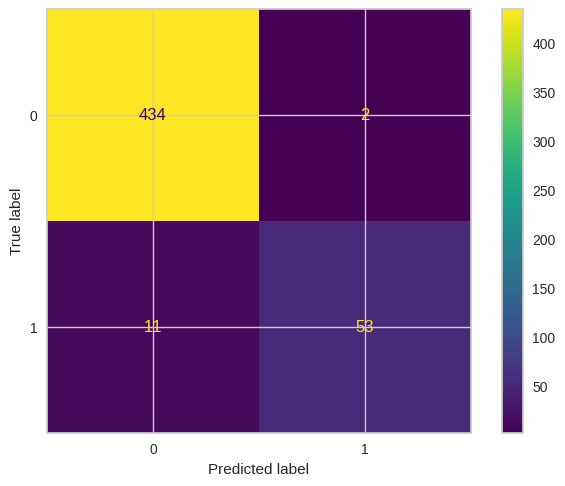

In [288]:
from sklearn.metrics import ConfusionMatrixDisplay
knn_census.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    knn_census, X_credit_teste, y_credit_teste
)

In [289]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.89      5600
        >50K       0.70      0.49      0.58      1727

    accuracy                           0.83      7327
   macro avg       0.78      0.71      0.74      7327
weighted avg       0.82      0.83      0.82      7327



# Regressão logística

In [290]:
from sklearn.linear_model import LogisticRegression

## Base risco de crédito

In [291]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [292]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [293]:
y_risco_credito # 2, 7, 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [294]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [295]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [296]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [297]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [298]:
logistic_risco_credito.intercept_

array([-0.80855152])

In [299]:
logistic_risco_credito.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

In [300]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

## Base credit data - 94.60%

In [301]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [302]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [303]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [304]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [305]:
logistic_credit.intercept_

array([-6.03333114])

In [306]:
logistic_credit.coef_

array([[-2.55275554, -3.72391763,  3.94333319]])

In [307]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [308]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [309]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

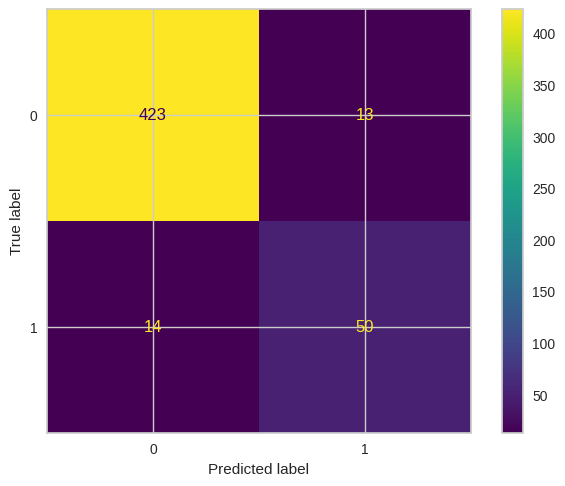

In [310]:
from sklearn.metrics import ConfusionMatrixDisplay
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    logistic_credit, X_credit_teste, y_credit_teste
)

0.946

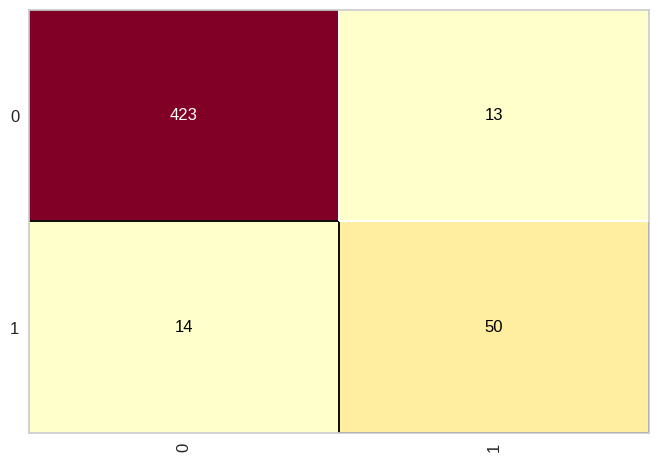

In [311]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [312]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base census - 84.95%

In [313]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [314]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [315]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [316]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [317]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [318]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [319]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8577862699604204

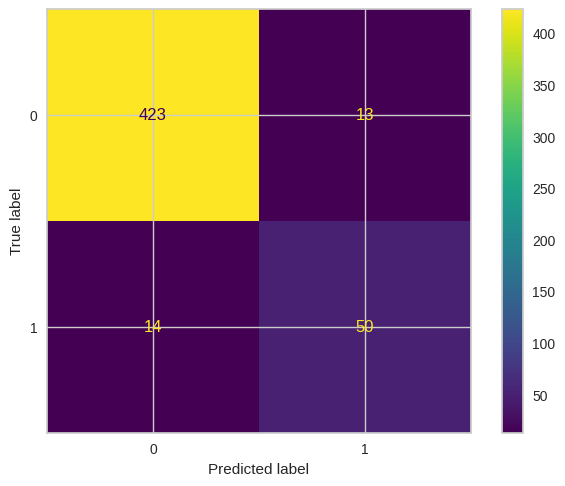

In [320]:
from sklearn.metrics import ConfusionMatrixDisplay
logistic_census.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    logistic_census, X_credit_teste, y_credit_teste
)

In [321]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      5600
        >50K       0.74      0.61      0.67      1727

    accuracy                           0.86      7327
   macro avg       0.81      0.77      0.79      7327
weighted avg       0.85      0.86      0.85      7327



# SVM

In [322]:
from sklearn.svm import SVC

## Base credit data - 98.80%

In [323]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [324]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [325]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [326]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [327]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [328]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [329]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.988

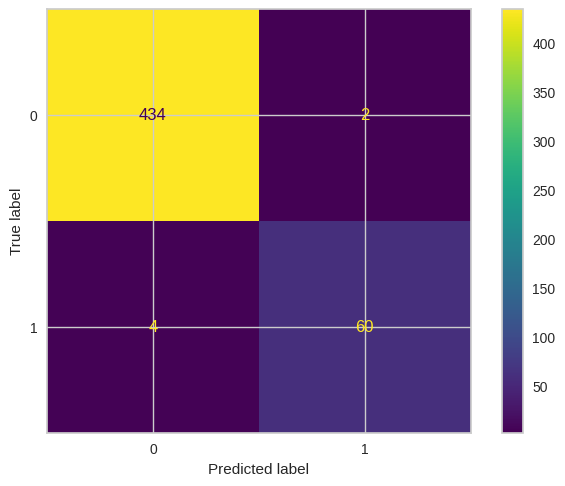

In [330]:
from sklearn.metrics import ConfusionMatrixDisplay
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    svm_credit, X_credit_teste, y_credit_teste
)

0.988

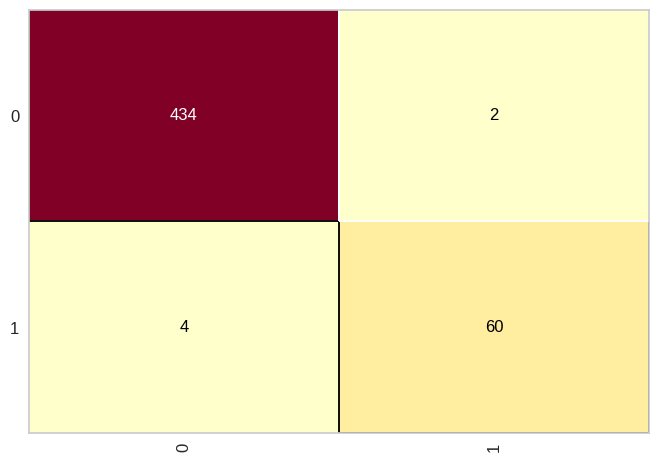

In [331]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [332]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base census - 85.07%

In [333]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [334]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [335]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [336]:
svm_census = SVC(kernel='linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [337]:
previsoes = svm_census.predict(X_census_teste)
previsoes

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'],
      dtype=object)

In [338]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [339]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8536918247577453

0.8536918247577453

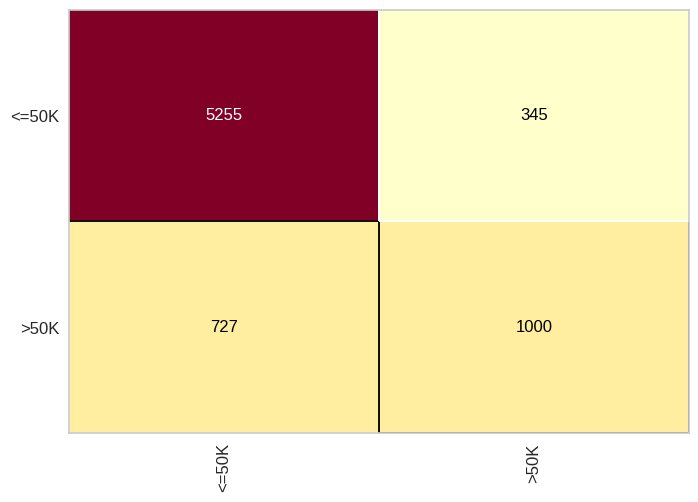

In [340]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [341]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      5600
        >50K       0.74      0.58      0.65      1727

    accuracy                           0.85      7327
   macro avg       0.81      0.76      0.78      7327
weighted avg       0.85      0.85      0.85      7327



# Redes neurais artificiais

In [342]:
from sklearn.neural_network import MLPClassifier

## Base credit data - 99.80%

In [343]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [344]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [345]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [346]:
#numero de neuronios na camada oculta
(3 + 1) / 2

2.0

In [347]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.61415890
Iteration 2, loss = 0.56488949
Iteration 3, loss = 0.52353984
Iteration 4, loss = 0.48803881
Iteration 5, loss = 0.45692980
Iteration 6, loss = 0.42862781
Iteration 7, loss = 0.40245495
Iteration 8, loss = 0.37797289
Iteration 9, loss = 0.35493862
Iteration 10, loss = 0.33362038
Iteration 11, loss = 0.31379397
Iteration 12, loss = 0.29551942
Iteration 13, loss = 0.27801166
Iteration 14, loss = 0.26208328
Iteration 15, loss = 0.24680315
Iteration 16, loss = 0.23279856
Iteration 17, loss = 0.22006770
Iteration 18, loss = 0.20826877
Iteration 19, loss = 0.19766427
Iteration 20, loss = 0.18811138
Iteration 21, loss = 0.17896357
Iteration 22, loss = 0.17066079
Iteration 23, loss = 0.16303780
Iteration 24, loss = 0.15594404
Iteration 25, loss = 0.14939002
Iteration 26, loss = 0.14336039
Iteration 27, loss = 0.13800088
Iteration 28, loss = 0.13271506
Iteration 29, loss = 0.12803170
Iteration 30, loss = 0.12381094
Iteration 31, loss = 0.11985036
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [348]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [349]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [350]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.994

Iteration 1, loss = 0.70112626
Iteration 2, loss = 0.64093025
Iteration 3, loss = 0.58815602
Iteration 4, loss = 0.54134319
Iteration 5, loss = 0.49969375
Iteration 6, loss = 0.46128178
Iteration 7, loss = 0.42534997
Iteration 8, loss = 0.39270495
Iteration 9, loss = 0.36281781
Iteration 10, loss = 0.33464860
Iteration 11, loss = 0.30815775
Iteration 12, loss = 0.28317519
Iteration 13, loss = 0.25986688
Iteration 14, loss = 0.23876060
Iteration 15, loss = 0.21922915
Iteration 16, loss = 0.20198385
Iteration 17, loss = 0.18673366
Iteration 18, loss = 0.17320724
Iteration 19, loss = 0.16139049
Iteration 20, loss = 0.15128985
Iteration 21, loss = 0.14237007
Iteration 22, loss = 0.13474153
Iteration 23, loss = 0.12794381
Iteration 24, loss = 0.12222201
Iteration 25, loss = 0.11707524
Iteration 26, loss = 0.11271457
Iteration 27, loss = 0.10856227
Iteration 28, loss = 0.10486206
Iteration 29, loss = 0.10166394
Iteration 30, loss = 0.09865085
Iteration 31, loss = 0.09598720
Iteration 32, los

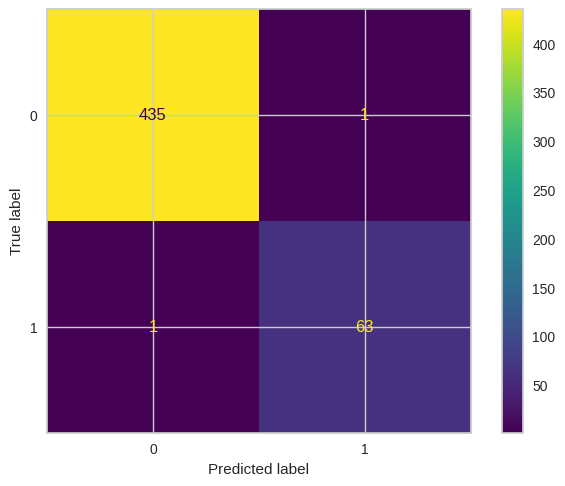

In [351]:
from sklearn.metrics import ConfusionMatrixDisplay
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    rede_neural_credit, X_credit_teste, y_credit_teste
)

0.996

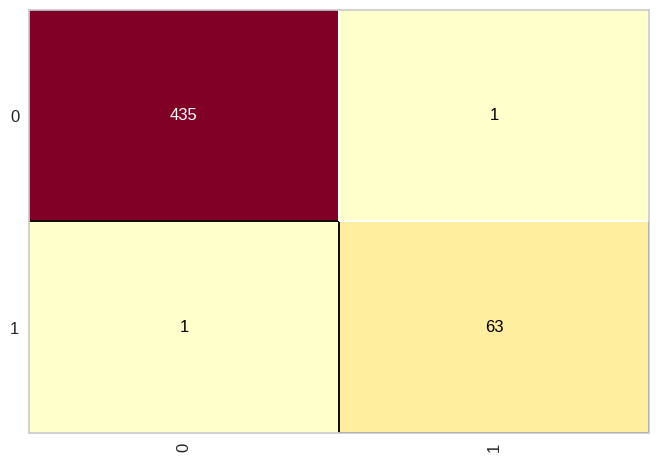

In [352]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [353]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      0.97      0.98        64

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



## Base census - 81.53%

In [354]:
import pickle

with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [355]:
X_census_treinamento.shape, y_census_treinamento.shape

((41515, 108), (41515,))

In [356]:
X_census_teste.shape, y_census_teste.shape

((7327, 108), (7327,))

In [357]:
#numero de neuronios - camadas ocultas
(108 + 1) / 2

54.5

In [358]:
# 108 -> 55 -> 55 -> 1
rede_neural_census = MLPClassifier(verbose=True, max_iter = 1000, tol=0.000010,
                                  hidden_layer_sizes = (55,55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.36883175
Iteration 2, loss = 0.32312228
Iteration 3, loss = 0.31300252
Iteration 4, loss = 0.30686055
Iteration 5, loss = 0.30265901
Iteration 6, loss = 0.29943782
Iteration 7, loss = 0.29731769
Iteration 8, loss = 0.29562669
Iteration 9, loss = 0.29333998
Iteration 10, loss = 0.29117865
Iteration 11, loss = 0.28995039
Iteration 12, loss = 0.28858731
Iteration 13, loss = 0.28688302
Iteration 14, loss = 0.28518419
Iteration 15, loss = 0.28374131
Iteration 16, loss = 0.28248979
Iteration 17, loss = 0.28122981
Iteration 18, loss = 0.28005813
Iteration 19, loss = 0.27816238
Iteration 20, loss = 0.27775478
Iteration 21, loss = 0.27581102
Iteration 22, loss = 0.27472964
Iteration 23, loss = 0.27325102
Iteration 24, loss = 0.27184692
Iteration 25, loss = 0.27099488
Iteration 26, loss = 0.26909500
Iteration 27, loss = 0.26866735
Iteration 28, loss = 0.26674070
Iteration 29, loss = 0.26667749
Iteration 30, loss = 0.26453223
Iteration 31, loss = 0.26358949
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [359]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [360]:
y_census_teste

38113    <=50K
39214    <=50K
44248    <=50K
10283    <=50K
26724    <=50K
         ...  
21024     >50K
33031    <=50K
1351      >50K
29376    <=50K
46485    <=50K
Name: income, Length: 7327, dtype: object

In [361]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8348573768254401

Iteration 1, loss = 0.86485849
Iteration 2, loss = 0.68708596
Iteration 3, loss = 0.55259194
Iteration 4, loss = 0.45437734
Iteration 5, loss = 0.38225209
Iteration 6, loss = 0.32927231
Iteration 7, loss = 0.28726053
Iteration 8, loss = 0.25290246
Iteration 9, loss = 0.22482328
Iteration 10, loss = 0.20119970
Iteration 11, loss = 0.18091862
Iteration 12, loss = 0.16387235
Iteration 13, loss = 0.14902387
Iteration 14, loss = 0.13663407
Iteration 15, loss = 0.12531387
Iteration 16, loss = 0.11610957
Iteration 17, loss = 0.10833756
Iteration 18, loss = 0.10123169
Iteration 19, loss = 0.09556122
Iteration 20, loss = 0.09037753
Iteration 21, loss = 0.08541156
Iteration 22, loss = 0.08141680
Iteration 23, loss = 0.07752264
Iteration 24, loss = 0.07409180
Iteration 25, loss = 0.07103513
Iteration 26, loss = 0.06809428
Iteration 27, loss = 0.06539109
Iteration 28, loss = 0.06297364
Iteration 29, loss = 0.06081077
Iteration 30, loss = 0.05855340
Iteration 31, loss = 0.05672797
Iteration 32, los

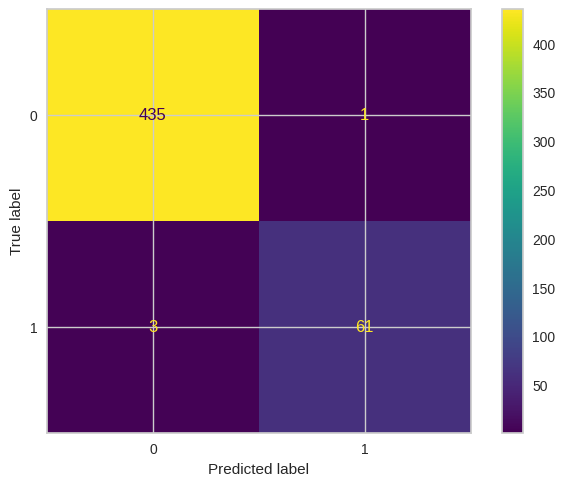

In [362]:
from sklearn.metrics import ConfusionMatrixDisplay
rede_neural_census.fit(X_credit_treinamento, y_credit_treinamento)
ConfusionMatrixDisplay.from_estimator(
    rede_neural_census, X_credit_teste, y_credit_teste
)

In [363]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      5600
        >50K       0.68      0.58      0.62      1727

    accuracy                           0.83      7327
   macro avg       0.78      0.75      0.76      7327
weighted avg       0.83      0.83      0.83      7327



# Avaliação dos algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

In [364]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [365]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [366]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [367]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [368]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [369]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [370]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [371]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

### Árvore de decisão

In [372]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [373]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


### Random forest

In [374]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [375]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
0.986


### Knn

In [376]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [377]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


### Regressão logística

In [378]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [379]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


### SVM

In [380]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [381]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


### Redes neurais

In [382]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [383]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

In [384]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9970000000000001


## Validação cruzada

In [385]:
from sklearn.model_selection import cross_val_score, KFold

In [386]:
10 * 30

300

In [387]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

1


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

2


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

3


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

4


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

5


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

6


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

7


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

8


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

9


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

10


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

11


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

12


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

13


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

14


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

15


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

16


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

17


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

18


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

19


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

20


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

21


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

22


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

23


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

24


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

25


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

26


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

27


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

28


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

29


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

In [388]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

Arvore  Random forest     KNN  Logistica     SVM  Rede neural
0   0.9865         0.9835  0.9815     0.9475  0.9845       0.9965
1   0.9835         0.9840  0.9800     0.9465  0.9840       0.9980
2   0.9905         0.9840  0.9795     0.9470  0.9865       0.9970
3   0.9870         0.9880  0.9780     0.9460  0.9850       0.9965
4   0.9885         0.9885  0.9820     0.9465  0.9850       0.9980
5   0.9885         0.9840  0.9780     0.9465  0.9845       0.9975
6   0.9880         0.9865  0.9805     0.9470  0.9860       0.9975
7   0.9875         0.9860  0.9800     0.9480  0.9850       0.9975
8   0.9870         0.9860  0.9795     0.9465  0.9840       0.9970
9   0.9870         0.9855  0.9820     0.9465  0.9845       0.9975
10  0.9860         0.9845  0.9795     0.9475  0.9840       0.9965
11  0.9900         0.9850  0.9825     0.9480  0.9845       0.9970
12  0.9890         0.9835  0.9825     0.9475  0.9855       0.9965
13  0.9865         0.9845  0.9780     0.9485  0.9855       0.9975
14  0.9830         0.9840  0.9810     0.9485  0.9830       0.9965
15  0.9855         0.9835  0.9790     0.9475  0.9865       0.9980
16  0.9855         0.9815  0.9810     0.9460  0.9860       0.9965
17  0.9905         0.9850  0.9800     0.9470  0.9865       0.9970
18  0.9875         0.9875  0.9805     0.9465  0.9850       0.9965
19  0.9870         0.9870  0.9795     0.9465  0.9845       0.9965
20  0.9830         0.9845  0.9820     0.9465  0.9840       0.9970
21  0.9865         0.9845  0.9825     0.9470  0.9850       0.9975
22  0.9890         0.9830  0.9780     0.9455  0.9865       0.9980
23  0.9875         0.9825  0.9810     0.9465  0.9875       0.9970
24  0.9875         0.9825  0.9795     0.9475  0.9870       0.9975
25  0.9885         0.9870  0.9790     0.9470  0.9820       0.9970
26  0.9875         0.9820  0.9770     0.9475  0.9840       0.9965
27  0.9855         0.9805  0.9785     0.9465  0.9865       0.9975
28  0.9865         0.9815  0.9790     0.9480  0.9835       0.9970
29  0.9885         0.9840  0.9805     0.9465  0.9865       0.9970

In [389]:
resultados.describe()

Arvore  Random forest        KNN  Logistica        SVM  Rede neural
count  30.000000      30.000000  30.000000  30.000000  30.000000    30.000000
mean    0.987150       0.984467   0.980050   0.947000   0.985083     0.997117
std     0.001903       0.001987   0.001533   0.000743   0.001280     0.000520
min     0.983000       0.980500   0.977000   0.945500   0.982000     0.996500
25%     0.986500       0.983500   0.979000   0.946500   0.984125     0.996500
50%     0.987250       0.984250   0.980000   0.947000   0.985000     0.997000
75%     0.988500       0.985875   0.981000   0.947500   0.986375     0.997500
max     0.990500       0.988500   0.982500   0.948500   0.987500     0.998000

In [390]:
resultados.var()

Arvore           3.623276e-06
Random forest    3.947126e-06
KNN              2.350862e-06
Logistica        5.517241e-07
SVM              1.639368e-06
Rede neural      2.704023e-07
dtype: float64

In [391]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.192827
Random forest    0.201809
KNN              0.156446
Logistica        0.078435
SVM              0.129977
Rede neural      0.052151
dtype: float64

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [392]:
alpha = 0.05

In [393]:
from scipy.stats import shapiro

In [394]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=np.float64(0.9500618307704192), pvalue=np.float64(0.16970614478601187)),
 ShapiroResult(statistic=np.float64(0.9787790726596712), pvalue=np.float64(0.792239923042527)),
 ShapiroResult(statistic=np.float64(0.9584024823930501), pvalue=np.float64(0.2818135378764127)),
 ShapiroResult(statistic=np.float64(0.9309147727892649), pvalue=np.float64(0.05193074013090626)),
 ShapiroResult(statistic=np.float64(0.9622985607506823), pvalue=np.float64(0.3541579284945434)),
 ShapiroResult(statistic=np.float64(0.8654539510822411), pvalue=np.float64(0.0013292950783975368)))

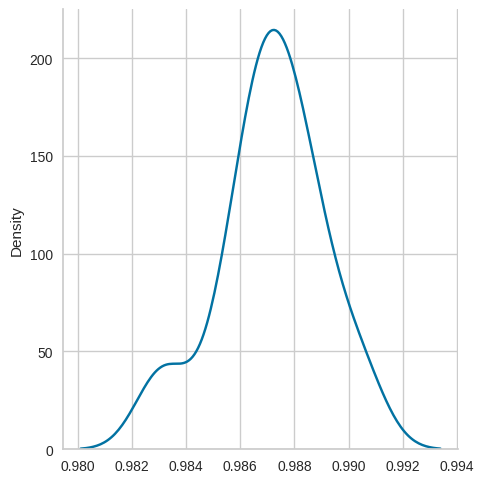

In [396]:
sns.displot(resultados_arvore, kind = 'kde');

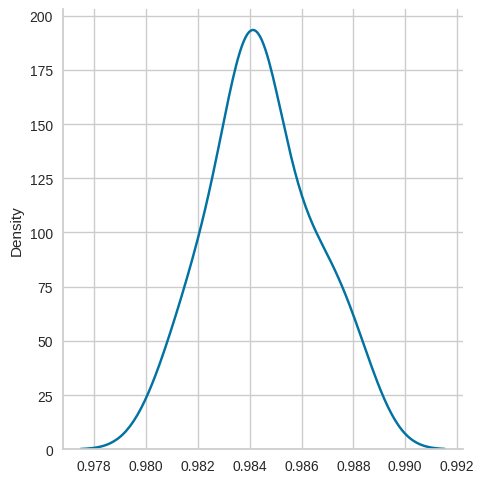

In [397]:
sns.displot(resultados_random_forest, kind = 'kde');

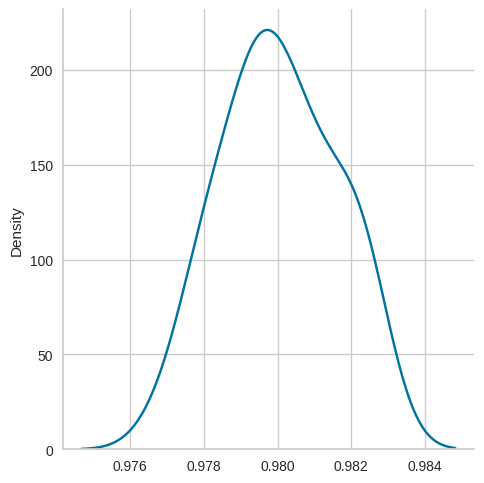

In [398]:
sns.displot(resultados_knn, kind = 'kde');

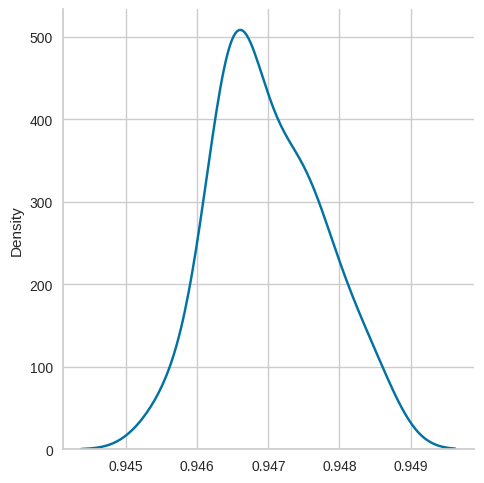

In [399]:
sns.displot(resultados_logistica, kind = 'kde');

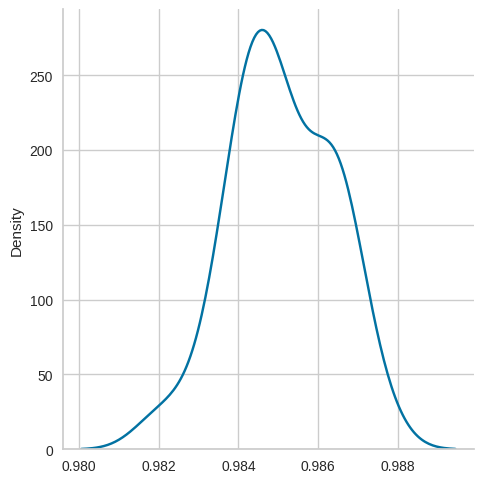

In [400]:
sns.displot(resultados_svm, kind = 'kde');

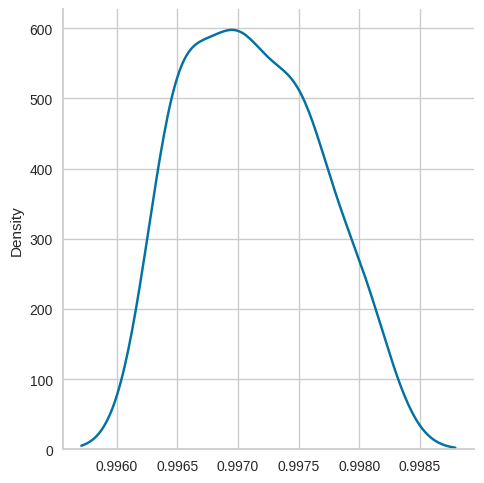

In [401]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

In [402]:
from scipy.stats import f_oneway

In [403]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

np.float64(3.147221823229279e-180)

In [404]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [405]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [406]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

accuracy    algoritmo
0      0.9865       arvore
1      0.9835       arvore
2      0.9905       arvore
3      0.9870       arvore
4      0.9885       arvore
..        ...          ...
175    0.9970  rede_neural
176    0.9965  rede_neural
177    0.9975  rede_neural
178    0.9970  rede_neural
179    0.9970  rede_neural

[180 rows x 2 columns]

In [407]:
from statsmodels.stats.multicomp import MultiComparison

In [408]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [409]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071    0.0 -0.0082  -0.006   True
       arvore     logistica  -0.0401    0.0 -0.0412 -0.0391   True
       arvore random_forest  -0.0027    0.0 -0.0038 -0.0016   True
       arvore   rede_neural     0.01    0.0  0.0089   0.011   True
       arvore           svm  -0.0021    0.0 -0.0031  -0.001   True
          knn     logistica   -0.033    0.0 -0.0341  -0.032   True
          knn random_forest   0.0044    0.0  0.0033  0.0055   True
          knn   rede_neural   0.0171    0.0   0.016  0.0181   True
          knn           svm    0.005    0.0   0.004  0.0061   True
    logistica random_forest   0.0375    0.0  0.0364  0.0385   True
    logistica   rede_neural   0.0501    0.0   0.049  0.0512   True
    logistica           svm   0.0381    0.0   0.037  0.0392   

In [410]:
resultados.mean()

Arvore           0.987150
Random forest    0.984467
KNN              0.980050
Logistica        0.947000
SVM              0.985083
Rede neural      0.997117
dtype: float64

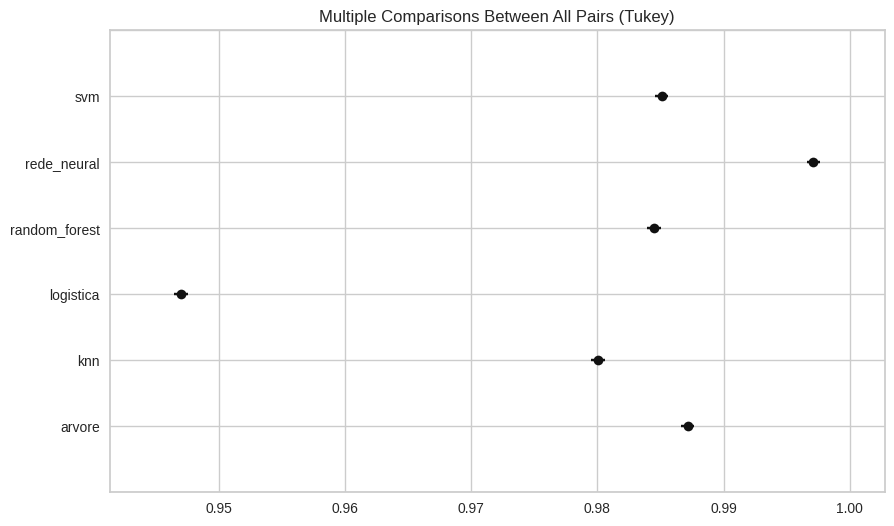

In [411]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [412]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [413]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [414]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [415]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [416]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [417]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [418]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [419]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [420]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [421]:
novo_registro = X_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [422]:
novo_registro.shape

(3,)

In [423]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [424]:
novo_registro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [425]:
rede_neural.predict(novo_registro)

array([1])

In [426]:
arvore.predict(novo_registro)

array([1])

In [427]:
svm.predict(novo_registro)

array([1])

# Combinação de classificadores

In [428]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [429]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [430]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(np.int64(1), np.int64(1), np.int64(1))

In [431]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o empréstimo')

Cliente não pagará o empréstimo


# Rejeição de classificadores

In [432]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [433]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [434]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(np.int64(1), np.int64(1), np.int64(1))

In [435]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[8.47084643e-05, 9.99915292e-01]])

In [436]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

np.float64(0.9999152915357218)

In [437]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

np.float64(1.0)

In [438]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

np.float64(0.992096071865081)

In [439]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede_neural[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o empréstimo, baseado em 1 algoritmos


# Redução de dimensionalidade

## Preparacão da base de dados

In [444]:
base_census = pd.read_csv('census.csv')
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [445]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [446]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [447]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [448]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [449]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [450]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [451]:
X_census

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [452]:
from sklearn.model_selection import train_test_split
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [453]:
X_census_treinamento.shape, X_census_teste.shape

((27676, 14), (4885, 14))

## PCA (Principal component analysis)

In [454]:
from sklearn.decomposition import PCA

In [455]:
pca = PCA(n_components=8)

In [456]:
X_census_treinamento_pca = pca.fit_transform(X_census_treinamento)
X_census_testes_pca = pca.transform(X_census_teste)

In [457]:
X_census_treinamento_pca.shape, X_census_testes_pca.shape

((27676, 8), (4885, 8))

In [458]:
X_census_treinamento

array([[-0.92239303,  1.46373585,  1.84273483, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-0.84908045,  0.09005041,  0.19630465, ..., -0.21665953,
         3.20416118,  0.29156857],
       [ 1.42360965, -1.28363502,  2.83572992, ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [-1.14233079,  0.09005041, -1.36867471, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.47054606, -1.28363502,  0.24712496, ..., -0.21665953,
         0.36951938,  0.29156857],
       [-0.99570562,  0.09005041, -0.02703374, ..., -0.21665953,
         0.61248868,  0.29156857]])

In [459]:
pca.explained_variance_ratio_

array([0.151561  , 0.10109701, 0.08980379, 0.08076277, 0.07627678,
       0.07357646, 0.06772289, 0.06690789])

In [460]:
pca.explained_variance_ratio_.sum()

np.float64(0.7077085943199317)

In [461]:
from sklearn.ensemble import RandomForestClassifier

In [462]:
random_forest_census_pca = RandomForestClassifier(n_estimators=40, random_state=0, criterion = 'entropy')
random_forest_census_pca.fit(X_census_treinamento_pca, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [463]:
previsoes = random_forest_census_pca.predict(X_census_testes_pca)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [464]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [465]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.8343909928352098

## Kernel PCA

In [466]:
from sklearn.decomposition import KernelPCA

In [467]:
kpca = KernelPCA(n_components=8, kernel='rbf')
X_census_treinamento_kpca = kpca.fit_transform(X_census_treinamento)
X_census_teste_kpca = kpca.transform(X_census_teste)

In [468]:
X_census_treinamento_kpca.shape, X_census_teste_kpca.shape

((27676, 8), (4885, 8))

In [469]:
X_census_treinamento_kpca

array([[ 0.18894283,  0.05517031, -0.08653531, ...,  0.41350358,
         0.06383854, -0.25147161],
       [ 0.16165577, -0.07855932, -0.03858728, ..., -0.01994034,
        -0.00338877, -0.29452204],
       [-0.085163  , -0.27486159,  0.12920466, ...,  0.19029531,
         0.04692292,  0.13187157],
       ...,
       [-0.27872683,  0.40033469,  0.20104327, ..., -0.17392304,
        -0.16108872,  0.00683154],
       [ 0.21829898, -0.12392098, -0.02312817, ..., -0.12231089,
         0.33364887,  0.25177643],
       [ 0.24961467,  0.42418174,  0.12141394, ..., -0.00408799,
        -0.18258341, -0.08239723]])

In [470]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_kpca = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_kpca.fit(X_census_treinamento_kpca, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [471]:
previsoes = random_forest_census_kpca.predict(X_census_teste_kpca)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [472]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [473]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.826202661207779

## LDA (Linear discriminant analysis)

In [483]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [484]:
X_census_treinamento_lda = lda.fit_transform(X_census_treinamento, y_census_treinamento)
X_census_teste_lda = lda.transform(X_census_teste)

In [486]:
X_census_treinamento_lda.shape, X_census_teste_lda.shape

((27676, 1), (4885, 1))

In [487]:
X_census_treinamento_lda

array([[-0.30226006],
       [ 0.64945145],
       [ 1.57912192],
       ...,
       [-1.37887999],
       [ 2.44698101],
       [-0.19212323]])

In [488]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census_lda = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
random_forest_census_lda.fit(X_census_treinamento_lda, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [489]:
previsoes = random_forest_census_lda.predict(X_census_teste_lda)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [490]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [491]:
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.7334698055271238

# Detecção de outliers

## Boxplot

In [494]:
base_credit = pd.read_csv('credit_data.csv')
base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

In [495]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [496]:
base_credit.dropna(inplace=True)

In [497]:
base_credit.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [498]:
1997 / 2

998.5

In [499]:
# Outliers idade
grafico = px.box(base_credit, y = 'age')
grafico.show()

In [500]:
outliers_age = base_credit[base_credit['age'] < 0]
outliers_age

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [501]:
# Outliers loan
grafico = px.box(base_credit, y='loan')
grafico.show()

In [502]:
outliers_loan = base_credit[base_credit['loan'] > 13300]
outliers_loan

clientid        income        age          loan  default
1378      1379  69755.320163  44.543682  13766.051239        0
1584      1585  67289.585683  26.727400  13376.797706        1
1801      1802  67802.694456  49.037987  13443.473176        0

## Gráfico de dispersão

In [503]:
# Income x age
grafico = px.scatter(x = base_credit['income'], y = base_credit['age'])
grafico.show()

In [504]:
# Income x loan
grafico = px.scatter(x = base_credit['income'], y = base_credit['loan'])
grafico.show()

In [505]:
# Age x loan
grafico = px.scatter(x = base_credit['age'], y = base_credit['loan'])
grafico.show()

In [506]:
base_census = pd.read_csv('census.csv')
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [507]:
# Age x final weight
grafico = px.scatter(x = base_census['age'], y = base_census['final-weight'])
grafico.show()

## Biblioteca PyOD

- Documentação: https://pyod.readthedocs.io/en/latest/#

In [508]:
!pip install pyod

In [509]:
from pyod.models.knn import KNN

In [510]:
base_credit.head(1)

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0

In [511]:
detector = KNN()
detector.fit(base_credit.iloc[:,1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [512]:
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 1])

In [513]:
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([1797,  200]))

In [514]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 704.78948078,  365.218309  ,  583.2159934 , ...,  395.01466508,
        557.88978241, 1071.5109404 ])

In [515]:
outliers = []
for i in range(len(previsoes)):
  #print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [516]:
print(outliers)

[4, 24, 28, 31, 35, 75, 87, 92, 101, 102, 108, 112, 125, 154, 157, 160, 162, 183, 215, 217, 231, 234, 272, 279, 289, 294, 301, 321, 322, 332, 339, 343, 347, 357, 358, 372, 391, 399, 401, 402, 411, 418, 419, 424, 446, 447, 449, 451, 477, 485, 486, 502, 505, 520, 528, 530, 532, 545, 570, 596, 630, 643, 660, 694, 707, 713, 734, 745, 762, 764, 839, 848, 875, 877, 882, 898, 924, 927, 930, 937, 942, 943, 949, 972, 974, 987, 989, 993, 996, 999, 1003, 1015, 1022, 1025, 1031, 1033, 1037, 1038, 1047, 1054, 1062, 1080, 1085, 1088, 1089, 1091, 1098, 1099, 1125, 1136, 1137, 1181, 1194, 1197, 1199, 1205, 1207, 1209, 1216, 1219, 1232, 1233, 1236, 1288, 1289, 1300, 1335, 1347, 1348, 1367, 1374, 1375, 1376, 1379, 1382, 1385, 1386, 1393, 1411, 1412, 1414, 1425, 1426, 1432, 1440, 1445, 1451, 1467, 1478, 1489, 1503, 1511, 1513, 1517, 1563, 1579, 1581, 1605, 1607, 1613, 1615, 1623, 1627, 1632, 1645, 1657, 1665, 1669, 1672, 1676, 1678, 1685, 1691, 1702, 1713, 1717, 1724, 1730, 1736, 1749, 1752, 1784, 1798, 

In [517]:
lista_outliers = base_credit.iloc[outliers,:]
lista_outliers

clientid        income        age          loan  default
4            5  66952.688845  18.584336   8770.099235        1
24          25  65301.984029  48.840922   5465.267886        0
29          30  58842.891308  54.510948  10871.186790        0
34          35  57584.973790  36.672021   1728.423755        0
38          39  60921.063104  18.840526    968.836383        0
...        ...           ...        ...           ...      ...
1943      1944  59792.508585  24.187499    660.241453        0
1944      1945  35879.519994  41.072935   5335.403499        0
1957      1958  50458.958203  52.314565   9852.889427        0
1996      1997  69516.127573  23.162104   3503.176156        0
1999      2000  69436.579552  56.152617   7378.833599        0

[200 rows x 5 columns]